## 1. DATAFRAME MERGING

In [1]:
# Data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

# Plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure charts appear in the notebook:
%matplotlib inline

In [2]:
# Load data

google_scholar_path = './datasets-1-self-healing-materials/shmin_google_scholar.csv'
df_google_scholar = pd.read_csv(google_scholar_path)

pubmed_path = './datasets-1-self-healing-materials/shmin_pubmed.csv'
df_pubmed = pd.read_csv(pubmed_path)

### Data Cleaning

In [3]:
# Normalize text to lower case for consistency
df_google_scholar['Title'] = df_google_scholar['Title'].str.lower()
df_google_scholar['Abstract'] = df_google_scholar['Abstract'].str.lower()
df_pubmed['Title'] = df_pubmed['Title'].str.lower()
df_pubmed['Abstract'] = df_pubmed['Abstract'].str.lower()

# Extract year from 'Author Info' in Google Scholar dataframe
df_google_scholar['Year'] = df_google_scholar['Author Info'].str.extract(r'(\d{4})')

# Show the first few rows after changes
df_google_scholar.head(), df_pubmed.head()

(                                               Title  \
 0                             self‐healing materials   
 1  self-healing cementitious materials: a review ...   
 2  recent advances in chitosan-based self-healing...   
 3       self healing concrete: a biological approach   
 4  a review: self-healing in cementitious materia...   
 
                                          Author Info  \
 0  MD Hager, P Greil, C Leyens… - … Materials, 20...   
 1  C Joseph, D Gardner, T Jefferson… - … -Constru...   
 2  F Ding, H Li, Y Du, X Shi - Research on Chemic...   
 3  HM Jonkers - Self healing materials: an altern...   
 4  M Wu, B Johannesson, M Geiker - Construction a...   
 
                                             Abstract  Year  
 0  … ’ reliability and, thus, revolutionise compo...  2010  
 1  … the self-healing materials discussed in this...  2011  
 2  … over the past few decades, self-healing mate...  2018  
 3  … construction. if so, the bacterial approach ...  2007  
 4

In [4]:
# Convert the 'Year' column in both dataframes to int64, handling missing or malformed data
df_google_scholar['Year'] = pd.to_numeric(df_google_scholar['Year'], errors='coerce').astype('Int64')
df_pubmed['Year'] = df_pubmed['Year'].astype('Int64')

# Merge the dataframes again based on 'Title' and 'Year'
merged_df = pd.merge(df_google_scholar, df_pubmed, on=['Title', 'Year'], how='outer', suffixes=('_gs', '_pm'))

# Preview the merged dataframe
merged_df.head()

,Title,Author Info,Abstract_gs,Year,Abstract_pm,Journal,Language,Month
0,self‐healing materials,"MD Hager, P Greil, C Leyens… - … Materials, 20...","… ’ reliability and, thus, revolutionise compo...",2010,NaN,NaN,NaN,NaN
1,self-healing cementitious materials: a review ...,"C Joseph, D Gardner, T Jefferson… - … -Constru...",… the self-healing materials discussed in this...,2011,NaN,NaN,NaN,NaN
2,recent advances in chitosan-based self-healing...,"F Ding, H Li, Y Du, X Shi - Research on Chemic...","… over the past few decades, self-healing mate...",2018,NaN,NaN,NaN,NaN
3,self healing concrete: a biological approach,HM Jonkers - Self healing materials: an altern...,"… construction. if so, the bacterial approach ...",2007,NaN,NaN,NaN,NaN
4,a review: self-healing in cementitious materia...,"M Wu, B Johannesson, M Geiker - Construction a...",… development of artificial self-healing mater...,2012,NaN,NaN,NaN,NaN


In [5]:
# Check data types of each column in both dataframes
df_google_scholar.dtypes, df_pubmed.dtypes

(Title          object
 Author Info    object
 Abstract       object
 Year            Int64
 dtype: object,
 Title       object
 Abstract    object
 Journal     object
 Language    object
 Year         Int64
 Month       object
 dtype: object)

In [6]:
# Filter out records that don't have an abstract either from Google Scholar or PubMed
filtered_df = merged_df[(merged_df['Abstract_gs'].notna()) | (merged_df['Abstract_pm'].notna())]

# For records that have abstracts from both sources, we'll concatenate them to capture maximum information
filtered_df['Consolidated_Abstract'] = filtered_df.apply(
    lambda row: (str(row['Abstract_gs']) if pd.notna(row['Abstract_gs']) else '') + ' ' + 
                (str(row['Abstract_pm']) if pd.notna(row['Abstract_pm']) else ''), axis=1)

# Show the first few records of the filtered DataFrame with the consolidated abstracts
filtered_df[['Title', 'Consolidated_Abstract']].head()

C:\Users\shamu\AppData\Local\Temp\ipykernel_20792\3570744161.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Consolidated_Abstract'] = filtered_df.apply(


,Title,Consolidated_Abstract
0,self‐healing materials,"… ’ reliability and, thus, revolutionise compo..."
1,self-healing cementitious materials: a review ...,… the self-healing materials discussed in this...
2,recent advances in chitosan-based self-healing...,"… over the past few decades, self-healing mate..."
3,self healing concrete: a biological approach,"… construction. if so, the bacterial approach ..."
4,a review: self-healing in cementitious materia...,… development of artificial self-healing mater...


### SettingWithCopyWarning

***Option 1: Using .loc[]***
In-Place Modification: When use .loc[], it is explicitly telling Pandas to modify the existing DataFrame slice in place. Operation is intended, and this generally suppresses the warning.

***Option 2: Creating a New DataFrame with .copy()*** Explicit Copy: By using .copy(), it is creating a new DataFrame that is separate from the original. This means can safely modify it without affecting the original DataFrame.

In [7]:
filtered_df = filtered_df.copy()
filtered_df['Consolidated_Abstract'] = filtered_df.apply(
    lambda row: (str(row['Abstract_gs']) if pd.notna(row['Abstract_gs']) else '') + ' ' + 
                (str(row['Abstract_pm']) if pd.notna(row['Abstract_pm']) else ''), axis=1)

In [8]:
filtered_df.columns.tolist()

['Title',
 'Author Info',
 'Abstract_gs',
 'Year',
 'Abstract_pm',
 'Journal',
 'Language',
 'Month',
 'Consolidated_Abstract']

## 2. Data Preprocessing

Segmentation: Divide the text into words or phrases. This is usually the first step in text data preprocessing.

Stemming: Reduce words to their root form to simplify the vocabulary.

In [9]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shamu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shamu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
# Initialize the Porter Stemmer and stopwords
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenization (Segmentation)
    tokens = word_tokenize(text.lower())  # Lowercasing and tokenizing
    
    # Removing Stopwords and Stemming
    filtered_tokens = [ps.stem(word) for word in tokens if word not in stop_words and word.isalnum()]  # Removing stopwords and stemming
    
    return " ".join(filtered_tokens)  # Joining back into a string

# Apply to DataFrame
filtered_df['Preprocessed_Abstract'] = filtered_df['Consolidated_Abstract'].apply(preprocess_text)

In [11]:
filtered_df.head()

,Title,Author Info,Abstract_gs,Year,Abstract_pm,Journal,Language,Month,Consolidated_Abstract,Preprocessed_Abstract
0,self‐healing materials,"MD Hager, P Greil, C Leyens… - … Materials, 20...","… ’ reliability and, thus, revolutionise compo...",2010,NaN,NaN,NaN,NaN,"… ’ reliability and, thus, revolutionise compo...",reliabl thu revolutionis compon construct desi...
1,self-healing cementitious materials: a review ...,"C Joseph, D Gardner, T Jefferson… - … -Constru...",… the self-healing materials discussed in this...,2011,NaN,NaN,NaN,NaN,… the self-healing materials discussed in this...,materi discuss review fall categori smart stru...
2,recent advances in chitosan-based self-healing...,"F Ding, H Li, Y Du, X Shi - Research on Chemic...","… over the past few decades, self-healing mate...",2018,NaN,NaN,NaN,NaN,"… over the past few decades, self-healing mate...",past decad materi deriv properti relat abil bi...
3,self healing concrete: a biological approach,HM Jonkers - Self healing materials: an altern...,"… construction. if so, the bacterial approach ...",2007,NaN,NaN,NaN,NaN,"… construction. if so, the bacterial approach ...",construct bacteri approach success compet abio...
4,a review: self-healing in cementitious materia...,"M Wu, B Johannesson, M Geiker - Construction a...",… development of artificial self-healing mater...,2012,NaN,NaN,NaN,NaN,… development of artificial self-healing mater...,develop artifici materi inspir differ materi n...


## 3. EDA - NLTK (Pos Tagging)

POS Tagging: Use POS tagging to understand the grammatical composition of your corpus. This can be done using NLTK.

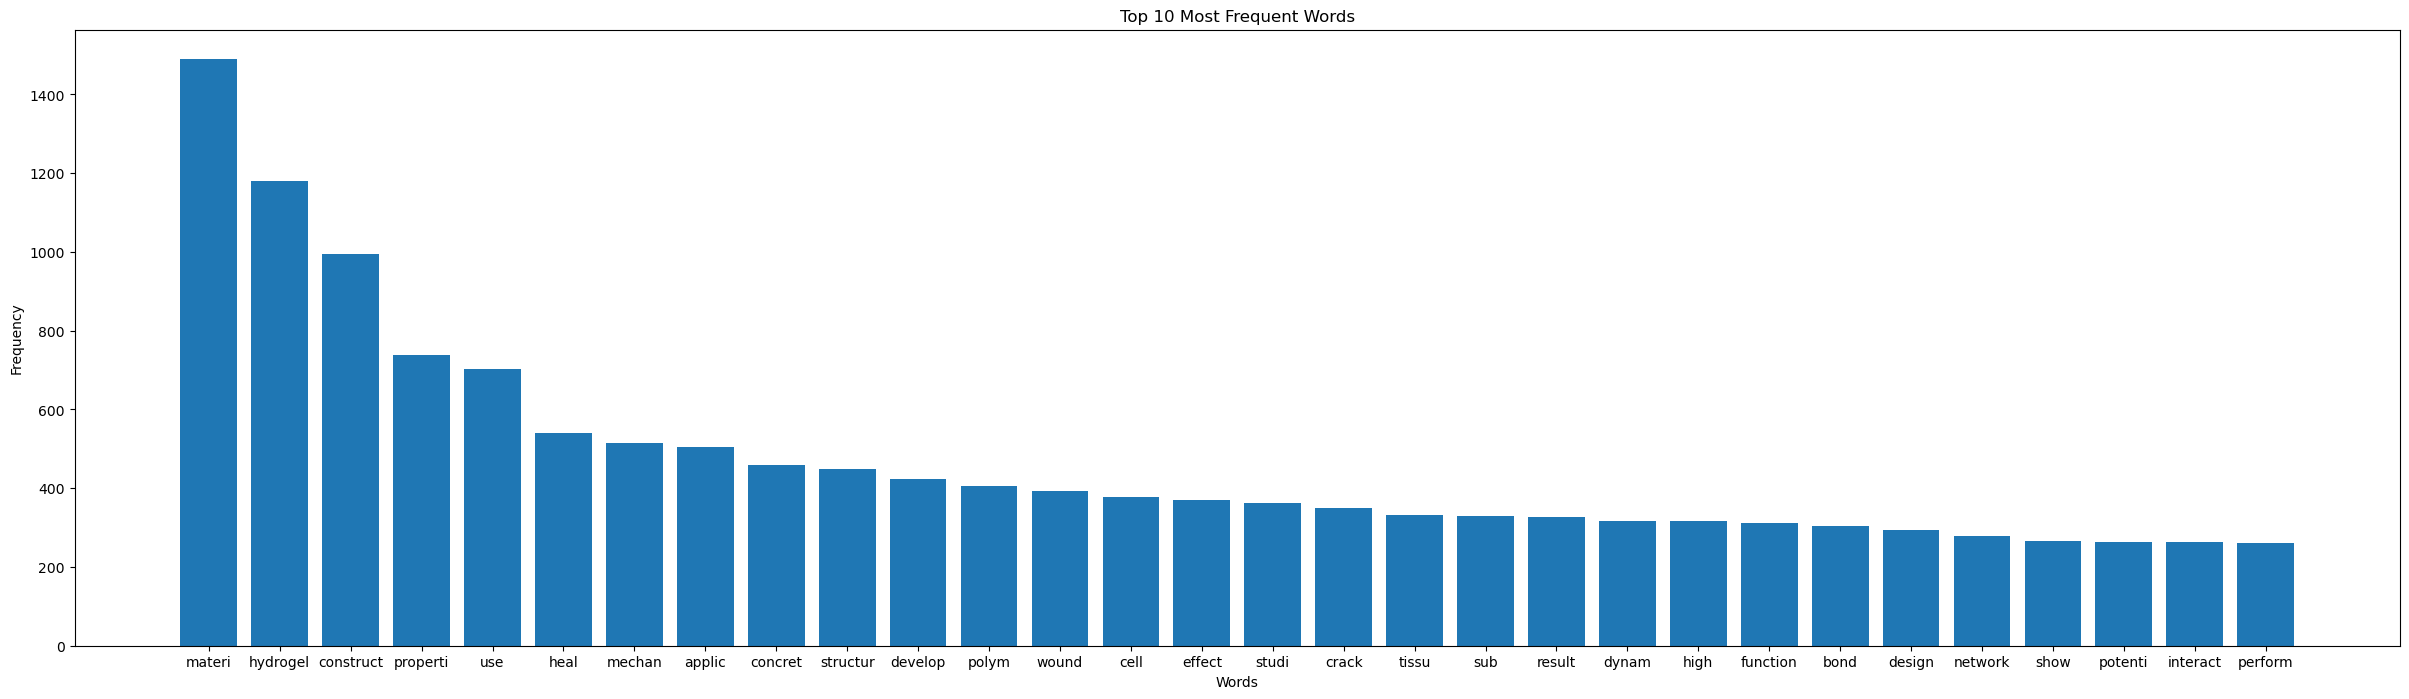

In [12]:
# Word freq analysis
from collections import Counter
import matplotlib.pyplot as plt

# Create a Counter object to get the frequency of each word
word_freq = Counter(" ".join(filtered_df['Preprocessed_Abstract']).split())
most_common_words = word_freq.most_common(30)

# Plotting the most common words
plt.figure(figsize=(30, 8))
plt.bar(*zip(*most_common_words))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.show()

In [13]:
# Part-of-Speech Tagging lib import
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shamu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [14]:
# Part-of-Speech Tagging
from nltk import pos_tag

# Sample some preprocessed abstracts
sample_abstracts = filtered_df['Preprocessed_Abstract'].sample(500)

# Apply POS tagging
pos_tags = [pos_tag(word_tokenize(text)) for text in sample_abstracts]
print(pos_tags)

[[('abstract', 'NN')], [('natur', 'JJ'), ('engin', 'NN'), ('delic', 'JJ'), ('synergist', 'NN'), ('coval', 'NN'), ('supramolecular', 'JJ'), ('polym', 'NN'), ('csp', 'NN'), ('achiev', 'NN'), ('advanc', 'NN'), ('life', 'NN'), ('function', 'NN'), ('thin', 'JJ'), ('filament', 'JJ'), ('assist', 'NN'), ('muscl', 'NN'), ('contract', 'NN'), ('construct', 'NN'), ('artifici', 'JJ'), ('synergist', 'NN'), ('csp', 'NN'), ('materi', 'NN'), ('bioinspir', 'NN'), ('mechan', 'NN'), ('adapt', 'NN'), ('featur', 'NN'), ('howev', 'NN'), ('repres', 'VBZ'), ('challeng', 'JJ'), ('goal', 'NN'), ('report', 'NN'), ('artifici', 'VBZ'), ('csp', 'JJ'), ('system', 'NN'), ('illustr', 'JJ'), ('integr', 'NN'), ('coval', 'NN'), ('polym', 'NN'), ('cp', 'NN'), ('supramolecular', 'JJ'), ('polym', 'NN'), ('sp', 'JJ'), ('synergist', 'JJ'), ('fashion', 'NN'), ('along', 'IN'), ('emerg', 'JJ'), ('notabl', 'NN'), ('mechan', 'NN'), ('dynam', 'VBZ'), ('properti', 'RB'), ('unattain', 'JJ'), ('two', 'CD'), ('polym', 'JJ'), ('form', 'N

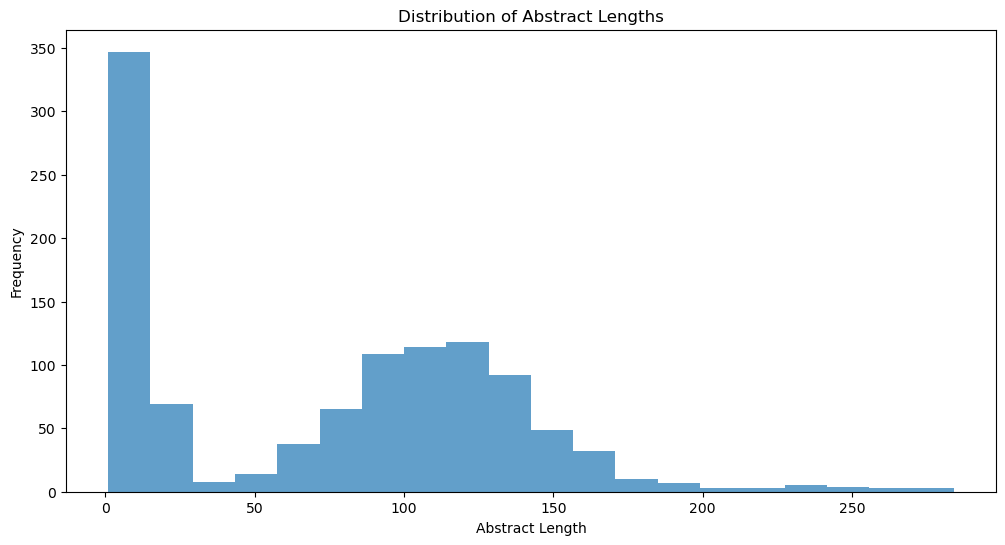

In [15]:
# Calculating the length of each preprocessed abstract
filtered_df['Abstract_Length'] = filtered_df['Preprocessed_Abstract'].apply(lambda x: len(x.split()))

# Plotting the distribution
plt.figure(figsize=(12, 6))
plt.hist(filtered_df['Abstract_Length'], bins=20, alpha=0.7)
plt.xlabel('Abstract Length')
plt.ylabel('Frequency')
plt.title('Distribution of Abstract Lengths')
plt.show()

## 4. Feature Extraction (TF-IDF / BoW)

TF-IDF / BoW: Before diving into complex models, start with these simpler techniques to convert text into numerical format.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

actual_abstracts = filtered_df['Preprocessed_Abstract']

# Apply POS tagging
pos_tags = [pos_tag(word_tokenize(text)) for text in sample_abstracts]

# Initialize a list to store POS counts for each document
pos_counts_list = []

# Count POS tags in each document
for tags in pos_tags:
    pos_counts = Counter(tag for word, tag in tags)
    pos_counts_list.append(pos_counts)

# Convert the list of POS counts to a DataFrame
df_pos = pd.DataFrame(pos_counts_list).fillna(0)

# Display the DataFrame
print(df_pos)

     NN    JJ  VBZ   IN   RB   CD   VB  VBD  VBP  NNS  ...  VBG  RBR  WRB  \
0     1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1    58  24.0  3.0  1.0  2.0  1.0  1.0  1.0  1.0  0.0  ...  0.0  0.0  0.0   
2     8   2.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  ...  0.0  0.0  0.0   
3    62  21.0  1.0  1.0  2.0  1.0  1.0  0.0  4.0  3.0  ...  0.0  0.0  0.0   
4    94  21.0  1.0  2.0  2.0  0.0  4.0  1.0  3.0  1.0  ...  0.0  0.0  0.0   
..   ..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
495  12   2.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
496   6   2.0  0.0  1.0  0.0  0.0  1.0  0.0  2.0  0.0  ...  0.0  0.0  0.0   
497  73  33.0  2.0  0.0  2.0  0.0  1.0  0.0  3.0  2.0  ...  0.0  0.0  0.0   
498  11   4.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
499  82  23.0  1.0  2.0  6.0  3.0  2.0  0.0  4.0  2.0  ...  0.0  0.0  0.0   

     PRP   WP   TO   RP  WP$   DT  SYM  
0    0.0  0.0  0.0  0.0  0.0  0.0 

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [20]:
# TF-IDF Feature Extraction
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sample_abstracts)
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Combine TF-IDF and POS Features
df_combined = pd.concat([df_tfidf, df_pos], axis=1).fillna(0)

## 5. Unsupervised Learning (Clustering)

Apply K-Means Clustering: Use the combined feature DataFrame (df_combined) to fit a K-Means model.

In [ ]:
from sklearn.cluster import KMeans

# Initialize K-Means
kmeans = KMeans(n_clusters=3)  # Assuming 3 clusters; you can change this number

# Fit the model
kmeans.fit(df_combined)

# Get cluster assignments
filtered_df['Cluster_Labels'] = kmeans.labels_

In [ ]:
# Inspect some items in each cluster
for i in range(3):  # Change 3 to the number of clusters you chose
    print(f"Cluster {i}:")
    print(filtered_df[filtered_df['Cluster_Labels'] == i]['Preprocessed_Abstract'].head())

## 6. Initial Modelling

Topic Modeling: Use basic Topic Modeling techniques like Latent Dirichlet Allocation (LDA) to categorize the papers into various topics.

## 6. Advanced Modelling

BERT: Once you've built some initial models and understood your data a bit more, you can move on to more complex models like BERT.

## 7. Specialized Analysis

### ~ BERT Fine-Tuned (Sentiment Analysis)

## 6. BERT

In [ ]:
pip install torch torchvision

In [ ]:
conda install pytorch torchvision -c pytorch

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')

### Summarization Function

In [ ]:
# Define a function that takes an abstract as input and returns the summarized text
def summarize_text(text):
    inputs = tokenizer([text], max_length=1024, return_tensors='pt', truncation=True)
    summary_ids = model.generate(inputs.input_ids, num_beams=4, min_length=30, max_length=100, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

***1. Sampling***

In [ ]:
sample_df = filtered_df.sample(n=10)  # Adjust n as needed
sample_df['Summarized_Abstract'] = sample_df['Consolidated_Abstract'].apply(summarize_text)

In [ ]:
print(sample_df[['Title', 'Summarized_Abstract']])
sample_df.to_csv('sample_summarized_abstracts.csv', index=False)

In [ ]:
filtered_df.shape

In [ ]:
# Apply the summarization function to the Consolidated_Abstract column of DataFrame.
filtered_df['Summarized_Abstract'] = filtered_df['Consolidated_Abstract'].apply(summarize_text)